# Step 1: Business Understanding

The goal is to firstly use clustering to determine the factors contributing to high customer complaints and then to use these factors to develop a multi classification model to predict the likelihood of a specific FG being returned.

# Step 2: Analytical Approach

 ### 2.1. Analytical Approach: 
 K modes algorithm will be used since we are working with categorical variables. It uses the dissimilarities(total mismatches) between the data points. The lesser the dissimilarities the more similar our data points are. It uses Modes instead of means as with K means which is used for numerical values. KMeans uses mathematical measures (distance) to cluster continuous data. The lesser the distance, the more similar our data points are. Centroids are updated by Means. But for categorical data points, we cannot calculate the distance 
 
***********************************************************************
Read: https://www.analyticssteps.com/blogs/5-clustering-methods-and-applications

For numerical data the options are:
1) Centroid/Partion based clustering e.g K modes, CLARANS (Clustering Large Applications based upon Randomized Search)
2) Density based clustering e.g. DBSCAN (Density-based Spatial Clustering of Applications with Noise),OPTICS (Ordering Points to Identify Clustering Structure)
3) Distribution/Model based clustering
4) Hierarchial clustering e.g. BIRCH (Balanced Iterative Reducing Clustering and using Hierarchies), CURE (Clustering Using Representatives)
5) Grid based clustering e.g. STING (Statistical Information Grid), Wave cluster, CLIQUE (Clustering In Quest)

For categorical data the options are:
1) Centroid/Partition based clustering e.g. K modes


For Mixed dataset (categorical and numerical): 
Read : https://medium.com/analytics-vidhya/the-ultimate-guide-for-clustering-mixed-data-1eefa0b4743b
1) Centroid/Partion based clustering e.g. Partitioning Around Medoids (PAM) using Gowers distance, K-prototypes alogorithm (mixed of kmodes and kmeans algorithm), numerically encode categorical data e.g with one hot encoding before using a numerical method like k-means or DBSCAN
2) Dimensional Reduction e.g. Factorial analysis of mixed data (FAMD), Uniform manifold approximation and projection for dimensional reduction (UMAP)
3) Hierarchial Clustering and Gowers distance
 
 ### 2.2. Data Requirements: 
 Require customer returns data from call centre showing various factors that are attributed to returned   goods    
 ### 2.3. Data Collection: 
 Data will be collected from KP heat system
 ### 2.4. Data Attributes:
   1. Plnt - Plant that experienced customer returns
   2. SLoc - Storage location of item
   3. Name 1 - Description of customer
   4. Description - Nature of customer complaint
   5. Material - Material complaint logged on
   6. Volume - Packsize of material FG
   7. City - City of supplier
   8. RSM - Sales managers
   9. SFG - Semi-finished goods
   10. StreamDescription - manufacturing stream description
   11. StockedStatus - MTS or MTO batches
   12. StockParetoABC - ABC category designation
   13. ProductBusinessUnit - Sales category according to business unit
   14. ProductSalesCategory - Sales Category
   15. FamilyHierarchyL3 - Further supply chain description
 

### 2.4. Data Understanding (Descriptive statistics/data visualization)

In [1]:
# Read the dataset (customer returns)

import pandas as pd  
pd.set_option('display.max_columns', None) 
df_returns = pd.read_excel('SA Returns Jan 2020 to March 2023.xlsx') 
df_returns

,Plnt,SLoc,Sold-to pt,Ship-to,Name 1,Created On,Time,Created By,OrdRs,Description,Sales Doc.,Item,Material,Batch,Order Quantity,SU,Net value,Curr.,Gross weight,WUn,Volume,VUn,Delivery,Item.1,Ac.GI date,Batch.1,Delivery quantity,SU.1,Order,Manuf. Dte,SLED/BBD,City,Street,REP,RSM
0,ZA13,CV01,102982,102982,Game Canal Walk G060(Century),2020-01-06,09:00:32,KAFRIKA,23,Short delivered by driver,60672237,80,OCC000001-0005,M193833796,3,EA,1100.34,ZAR,21.486,KG,15.0,L,84128534,10,2020-01-06,M193833796,3,EA,200000078881,2019-10-15,2029-10-13,Milnerton,"Shop 549, Canal Walk",50000355 - Barend Venter,50003670 - Gerrie Stemmet
1,ZA13,CV01,102982,102982,Game Canal Walk G060(Century),2020-01-06,09:00:32,KAFRIKA,23,Short delivered by driver,60672237,170,GTC000001-0005,M193333176,4,EA,1142.08,ZAR,21.400,KG,20.0,L,84128534,20,2020-01-06,M193333176,4,EA,200000077607,2019-09-17,2025-09-16,Milnerton,"Shop 549, Canal Walk",50000355 - Barend Venter,50003670 - Gerrie Stemmet
2,ZA13,CV01,102982,102982,Game Canal Walk G060(Century),2020-01-06,09:00:32,KAFRIKA,23,Short delivered by driver,60672237,180,GTC000001-0001,M193333176,5,EA,389.30,ZAR,5.600,KG,5.0,L,84128534,30,2020-01-06,M193333176,5,EA,200000077606,2019-09-16,2025-09-15,Milnerton,"Shop 549, Canal Walk",50000355 - Barend Venter,50003670 - Gerrie Stemmet
3,ZA13,CV01,105105,105105,Plascon Personnel Acc For Own Use,2020-01-06,09:10:19,KAFRIKA,12,Incorrectly ordered by customer,60672244,10,TCR000002-0020,L194450935,1,EA,573.30,ZAR,24.550,KG,20.0,L,84128535,10,2020-01-06,L194450935,1,EA,200000081354,2019-11-19,2025-11-18,Krugersdorp,10 Frederick Cooper Drive,50003405 - Mbali Malinga,50003405 - Mbali Malinga
4,ZA13,CV01,100348,100348,Wellington Paint & H/W Bi - 35667,2020-01-06,09:12:08,KAFRIKA,30,B/O no longer required,60672245,10,TDV001000-0049,L194050288,4,EA,796.28,ZAR,12.376,KG,9.0,L,84128536,10,2020-01-06,L194050288,4,EA,200000081593,2019-12-09,2029-12-07,Cape Town,33 Main Road,50001527 - Mark Walters,50001522 - Glen Martin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108277,ZA01,FA01,IC013,IC013,Sizwe Paints Pty Ltd - Deco,2023-03-31,13:08:40,CSEOPA,Z33,B/O no longer required,60981760,60,UC000001-0005,M223540888,4,EA,1141.16,ZAR,29.200,KG,20.0,L,84172831,20,2023-03-31,M223540888,4,EA,200000116801,2022-09-21,2028-09-20,Midrand,564 James Crescent,50000918 - Mikateko Maluleke,50000923 - Povendhiran Pillay
108278,ZA13,CV01,102998,102998,Buco Bergvliet - 1459,2023-03-31,13:58:09,MMORUBANE,Z20,Not to Spec: Colour,60981771,10,TWA001000-0020,L223567101,2,EA,2730.00,ZAR,50.182,KG,40.0,L,84172848,10,NaT,L223567101,2,EA,200000116893,2022-10-03,2032-10-01,Cape Town,151 Main Road,50001529 - Zeenat Mather,50001522 - Glen Martin
108279,ZA13,CV01,102998,102998,Buco Bergvliet - 1459,2023-03-31,14:10:22,MMORUBANE,Z03,Customer Error/over stock/not required,60981772,80,101801-7238,L230369072,1,EA,97.79,ZAR,2.200,KG,2.0,L,84172833,10,NaT,L230369072,1,EA,200000120077,2023-02-20,2029-02-18,Cape Town,151 Main Road,50001529 - Zeenat Mather,50001522 - Glen Martin
108280,ZA15,CV01,104497,104497,Game Mthatha - G085,2023-03-31,14:23:46,NNGCAI,Z03,Customer Error/over stock/not required,60981775,10,BBO000605-0020,L224267973,4,EA,3723.60,ZAR,103.740,KG,80.0,L,84172834,10,2023-03-31,L224267973,4,EA,200000118287,2022-11-02,2032-10-30,Mthatha,"Shop no 34, Mthatha Plaza",50000355 - Barend Venter,50003670 - Gerrie Stemmet


In [2]:
# read the mastersku data
import pandas as pd
pd.set_option('display.max_rows', 5)
df2 = pd.read_excel('MasterProductionPlanning.xlsx')
df2

,ProductCode,StockedStatus,StockParetoABC,ProductDescription,PackSizeVol,PackNettWeight,SFG,SGConfirmed,SFGResupply,FGResupply,ProductBusinessUnit,ProductSalesCategory,Pallet,ShelfLife,Stream,StreamDescription
0,101002-2251,MTS,A,Pcell Pfilla Int. Crack Filler-12kg,12.000,12.00000,FXA005168,1.000,ZA02,ZA02,DECORATIVE CONSUMER,SPECIALITY,60,NaN,ZA02_PP_PPO,Powder Manufacture
1,101002-7241,MTS,C,Pcell Pfilla Int. Crack Filler-20x500g,10.000,10.00000,FXA005168,1.000,ZA02,ZA02,DECORATIVE CONSUMER,SPECIALITY,30,NaN,ZA02_PP_PPO,Powder Manufacture
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1750,XZTC/25KG,MTS,Y,Xeracolour Zero Voc-Tr Yellow Oxide-25kg,18.724,24.99654,XZTC-HOC,1.335,ZA09,ZA09,COLOURANTS,COLOURANTS,24,NaN,ZA09_BM_HOC,Hockmeyer Basketmill
1751,XZTF/25KG,MTS,Y,Xeracolour Zero Voc-Tr Red Oxide-25kg,18.724,24.99654,XZTF-HOC,1.335,ZA09,ZA09,COLOURANTS,COLOURANTS,24,NaN,ZA09_BM_HOC,Hockmeyer Basketmill


In [3]:
#import data from MasterskuListWithSFG

import pandas as pd
pd.set_option('display.max_rows', 5)
df3 = pd.read_excel('MasterSKUListWithSFG.xlsx')
df3

,CompanyCode,ProductCode,StockedStatus,TopSKUs,StockParetoABC,ProductDescription,PackSizeVol,SFG,SGConfirmed,SFGResupply,FGResupply,ProductBusinessUnit,ProductSalesCategory,Hierarchy,FamilyHierarchyL1,FamilyHierarchyL2,FamilyHierarchyL3,Pallet,Layer,Tray,ShelfLife,MaterialCategory,ProductID
0,8811,101002-2251,MTS,Top Consumer SKU,A,Pcell Pfilla Int. Crack Filler-12kg,12.0,FXA005168,1.0,ZA02,ZA02,DECORATIVE CONSUMER,SPECIALITY,200112004120000489,Surface Preparation & Cleaning,Polycell,Polycell Fillers,60,10,1,NaN,NaN,182
1,8811,101002-7241,MTS,General SKU,C,Pcell Pfilla Int. Crack Filler-20x500g,10.0,FXA005168,1.0,ZA02,ZA02,DECORATIVE CONSUMER,SPECIALITY,200112004120000489,Surface Preparation & Cleaning,Polycell,Polycell Fillers,30,5,1,NaN,NaN,185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,8814,ZMT000048-9925,MTS,General SKU,C,Utility Masking Tape-48MM,1.0,Not Relevant,1.0,EPZA,EPZA,DECORATIVE CONSUMER,ANCILLARY,200142004920000527,Ancillary Item,General,General Other,1,1,1,NaN,NaN,6925
2246,8814,ZPS000010-9925,MTO,General SKU,W,Colad Paint Strainer,1.0,Not Relevant,1.0,NaN,NaN,AUTOMOTIVE,ANCILLARY,50000600000004,Ancilliary Items,Bodyshop Essentials,Non Branded,1,1,1,NaN,NaN,6932


In [4]:
df_returns.dtypes

Plnt    object
SLoc    object
         ...  
REP     object
RSM     object
Length: 35, dtype: object

In [5]:
df_returns.shape
# the dataset has 42 columns and 81627 rows of data

(108282, 35)

In [6]:
df2.shape

(1752, 16)

In [7]:
df3.shape

(2247, 23)

In [8]:
pd.set_option('display.max_rows', None)
df_returns.describe()

,Sales Doc.,Item,Order Quantity,Net value,Gross weight,Volume,Delivery,Item.1,Delivery quantity,Order
count,1.082820e+05,108282.000000,108282.000000,108282.000000,108282.000000,108282.000000,1.082820e+05,108282.000000,108282.00000,1.082820e+05
mean,6.084491e+07,93.020511,4.423210,2213.489947,53.518828,41.934829,8.415433e+07,38865.011101,3.61869,1.999428e+11
std,8.139289e+04,219.004646,14.764265,7183.414415,189.739293,141.723835,1.180143e+04,182781.249139,13.74801,2.392188e+09
min,6.067224e+07,10.000000,0.000000,-0.060000,0.000000,0.000000,8.412853e+07,10.000000,0.00000,1.000000e+11
25%,6.078508e+07,20.000000,1.000000,336.830000,5.000000,5.000000,8.414574e+07,10.000000,1.00000,2.000001e+11
50%,6.084668e+07,50.000000,2.000000,749.790000,12.400000,10.000000,8.415512e+07,40.000000,1.00000,2.000001e+11
75%,6.091284e+07,110.000000,4.000000,1711.860000,36.260000,30.000000,8.416427e+07,100.000000,3.00000,2.000001e+11
max,6.098178e+07,5090.000000,1000.000000,410178.840000,12962.880000,8960.000000,8.417285e+07,900032.000000,1000.00000,2.000001e+11


In [9]:
pd.set_option('display.max_rows', None)
df2.describe()

,PackSizeVol,PackNettWeight,SGConfirmed,Pallet,ShelfLife
count,1752.000000,1750.000000,1750.000000,1752.000000,0.0
mean,12.741751,15.268358,1.227890,166.561073,NaN
std,30.649495,35.948393,0.396395,200.835069,NaN
min,0.000000,0.000000,0.720000,1.000000,NaN
25%,1.000000,1.300500,1.005000,24.000000,NaN
50%,5.000000,5.400000,1.180000,96.000000,NaN
75%,18.340000,22.066068,1.341750,378.000000,NaN
max,200.000000,336.000000,13.000000,1740.000000,NaN


In [10]:
pd.set_option('display.max_rows', None)
df3.describe()

,CompanyCode,PackSizeVol,SGConfirmed,Hierarchy,Pallet,Layer,Tray,ShelfLife,MaterialCategory,ProductID
count,2247.000000,2247.000000,2183.000000,2.247000e+03,2247.000000,2247.000000,2247.000000,0.0,0.0,2247.000000
mean,8811.098353,10.407693,1.171017,1.528104e+17,219.944815,27.047174,3.843792,NaN,NaN,11740.650200
std,0.705299,27.564656,0.258427,1.120513e+17,243.110270,24.471265,3.311934,NaN,NaN,8577.140277
min,8811.000000,0.020000,0.720000,1.000120e+13,1.000000,1.000000,1.000000,NaN,NaN,182.000000
25%,8811.000000,1.000000,1.000000,9.000040e+13,24.000000,8.000000,1.000000,NaN,NaN,4133.500000
50%,8811.000000,4.495000,1.060000,2.000120e+17,96.000000,24.000000,4.000000,NaN,NaN,6812.000000
75%,8811.000000,10.000000,1.270000,2.000820e+17,378.000000,48.000000,6.000000,NaN,NaN,21289.500000
max,8818.000000,200.000000,3.124500,4.000140e+17,1740.000000,144.000000,24.000000,NaN,NaN,23142.000000


In [11]:
pd.set_option('display.max_rows', 10)
df_returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108282 entries, 0 to 108281
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Plnt               108282 non-null  object        
 1   SLoc               108136 non-null  object        
 2   Sold-to pt         108282 non-null  object        
 3   Ship-to            108282 non-null  object        
 4   Name 1             108282 non-null  object        
 5   Created On         108282 non-null  datetime64[ns]
 6   Time               108282 non-null  object        
 7   Created By         108282 non-null  object        
 8   OrdRs              108282 non-null  object        
 9   Description        108282 non-null  object        
 10  Sales Doc.         108282 non-null  int64         
 11  Item               108282 non-null  int64         
 12  Material           108282 non-null  object        
 13  Batch              83846 non-null   object  

In [12]:
pd.set_option('display.max_rows', 10)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductCode           1752 non-null   object 
 1   StockedStatus         1752 non-null   object 
 2   StockParetoABC        1752 non-null   object 
 3   ProductDescription    1752 non-null   object 
 4   PackSizeVol           1752 non-null   float64
 5   PackNettWeight        1750 non-null   float64
 6   SFG                   1751 non-null   object 
 7   SGConfirmed           1750 non-null   float64
 8   SFGResupply           1752 non-null   object 
 9   FGResupply            1739 non-null   object 
 10  ProductBusinessUnit   1752 non-null   object 
 11  ProductSalesCategory  1752 non-null   object 
 12  Pallet                1752 non-null   int64  
 13  ShelfLife             0 non-null      float64
 14  Stream                1752 non-null   object 
 15  StreamDescription    

In [13]:
pd.set_option('display.max_rows', 10)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2247 entries, 0 to 2246
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CompanyCode           2247 non-null   int64  
 1   ProductCode           2247 non-null   object 
 2   StockedStatus         2247 non-null   object 
 3   TopSKUs               2247 non-null   object 
 4   StockParetoABC        2247 non-null   object 
 5   ProductDescription    2247 non-null   object 
 6   PackSizeVol           2247 non-null   float64
 7   SFG                   2185 non-null   object 
 8   SGConfirmed           2183 non-null   float64
 9   SFGResupply           2202 non-null   object 
 10  FGResupply            2202 non-null   object 
 11  ProductBusinessUnit   2247 non-null   object 
 12  ProductSalesCategory  2247 non-null   object 
 13  Hierarchy             2247 non-null   int64  
 14  FamilyHierarchyL1     2247 non-null   object 
 15  FamilyHierarchyL2    

# Step 3: Exploratory Data Analysis

In [14]:
# determine unique categories within each categorical variable
# seperate only the categorical columns


# Create an empty dictionary to store value counts for each column
value_counts_dict = {}

# Iterate over each column in the DataFrame
for column in df_returns.columns:
    # Apply value_counts() to the column and store the result in the dictionary
    value_counts_dict[column] = df_returns[column].value_counts()

# Convert the dictionary to a DataFrame for easy viewing
value_counts_df = pd.DataFrame(value_counts_dict)

# Display the DataFrame of value counts for all columns
value_counts_df

#export to Excel and analyze further

,Plnt,SLoc,Sold-to pt,Ship-to,Name 1,Created On,Time,Created By,OrdRs,Description,Sales Doc.,Item,Material,Batch,Order Quantity,SU,Net value,Curr.,Gross weight,WUn,Volume,VUn,Delivery,Item.1,Ac.GI date,Batch.1,Delivery quantity,SU.1,Order,Manuf. Dte,SLED/BBD,City,Street,REP,RSM
ZA01,55845.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZA13,25899.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZA17,11966.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZA15,10779.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZA10,2035.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000356 - Salvatore Makopo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN
50004209 - Suvasin Moodley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0
50003681 - Navin Juggernath(CLOSED),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
50004216 - Paula Kisting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0


In [15]:
# determine unique categories within each categorical variable
# seperate only the categorical columns


# Create an empty dictionary to store value counts for each column
value_counts_dict = {}

# Iterate over each column in the DataFrame
for column in df2.columns:
    # Apply value_counts() to the column and store the result in the dictionary
    value_counts_dict[column] = df2[column].value_counts()

# Convert the dictionary to a DataFrame for easy viewing
value_counts_df = pd.DataFrame(value_counts_dict)

# Display the DataFrame of value counts for all columns
value_counts_df

#export to Excel and analyze further

,ProductCode,StockedStatus,StockParetoABC,ProductDescription,PackSizeVol,PackNettWeight,SFG,SGConfirmed,SFGResupply,FGResupply,ProductBusinessUnit,ProductSalesCategory,Pallet,ShelfLife,Stream,StreamDescription
0.0,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.0008,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.000815,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.00088,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.000915,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZA09_HD_HSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.0,NaN
ZA09_HD_NMN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
ZA14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
ZA14_GP_GEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [16]:
# determine unique categories within each categorical variable
# seperate only the categorical columns


# Create an empty dictionary to store value counts for each column
value_counts_dict = {}

# Iterate over each column in the DataFrame
for column in df3.columns:
    # Apply value_counts() to the column and store the result in the dictionary
    value_counts_dict[column] = df3[column].value_counts()

# Convert the dictionary to a DataFrame for easy viewing
value_counts_df = pd.DataFrame(value_counts_dict)

# Display the DataFrame of value counts for all columns
value_counts_df

#export to Excel and analyze further

,CompanyCode,ProductCode,StockedStatus,TopSKUs,StockParetoABC,ProductDescription,PackSizeVol,SFG,SGConfirmed,SFGResupply,FGResupply,ProductBusinessUnit,ProductSalesCategory,Hierarchy,FamilyHierarchyL1,FamilyHierarchyL2,FamilyHierarchyL3,Pallet,Layer,Tray,ShelfLife,MaterialCategory,ProductID
0.02,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.1,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.25,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.3,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.5,NaN,NaN,NaN,NaN,NaN,NaN,104.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zero VOC Waterbased,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,NaN,NaN,NaN,NaN,NaN,NaN
Zinc Dust For Plascozinc 1-13.3KG,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zinc Epoxy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Zinc Phophate Epoxy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN


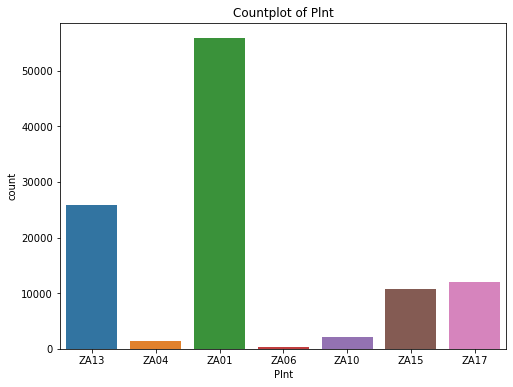

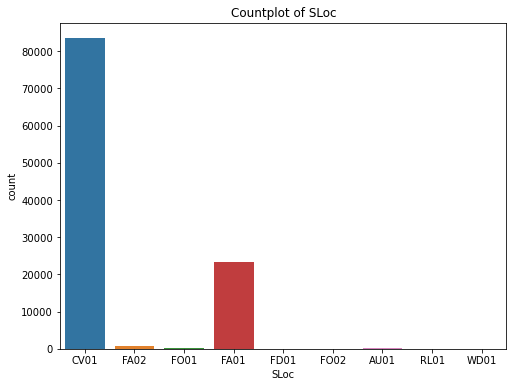

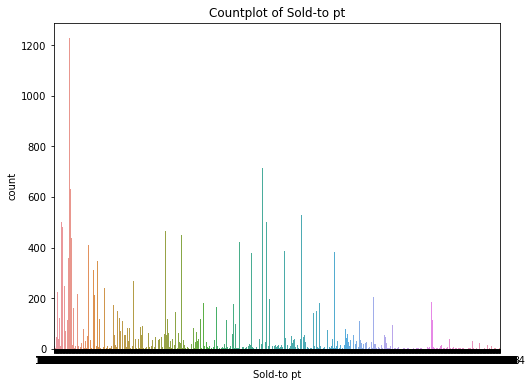

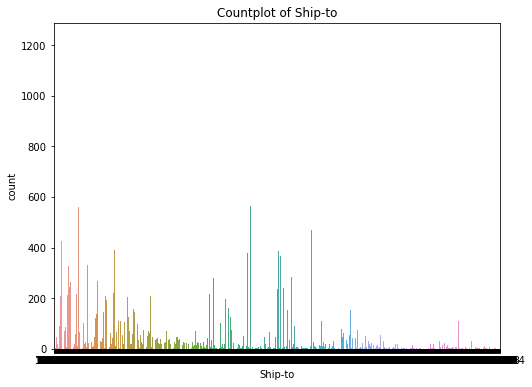

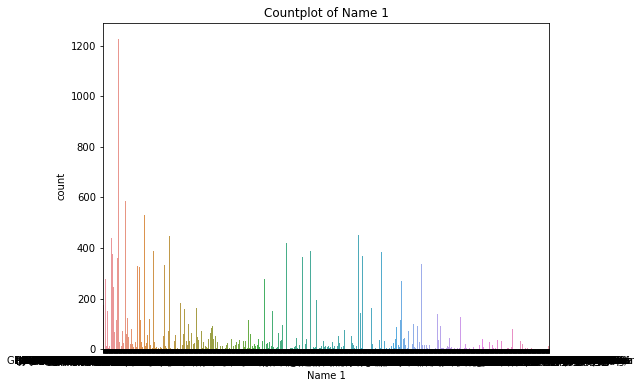

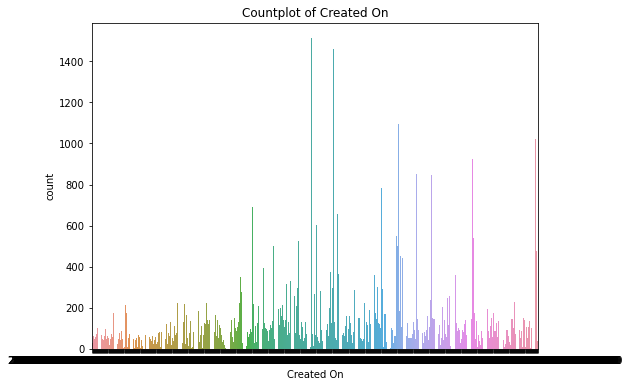

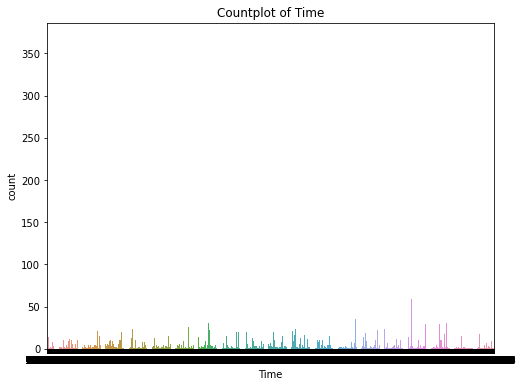

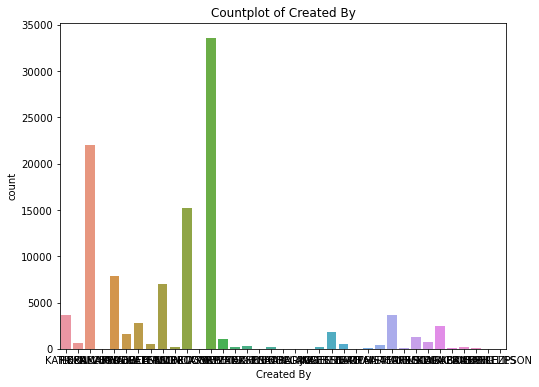

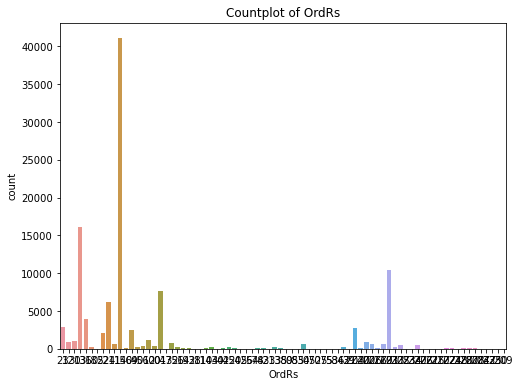

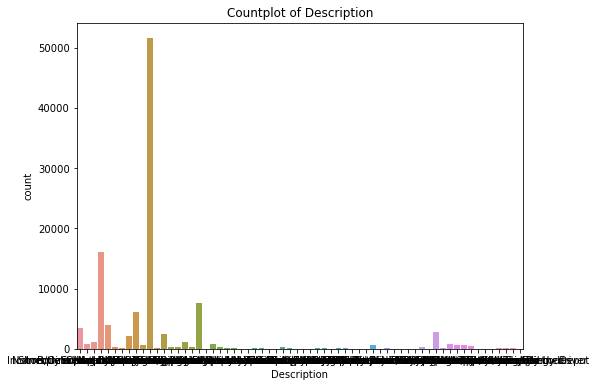

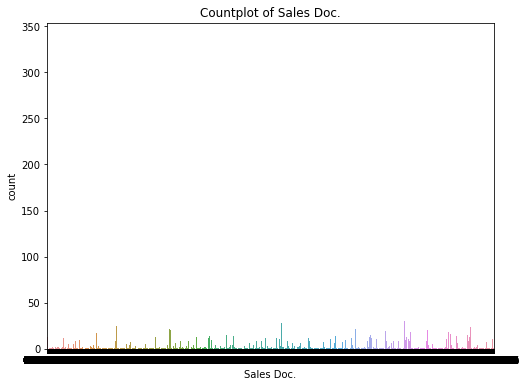

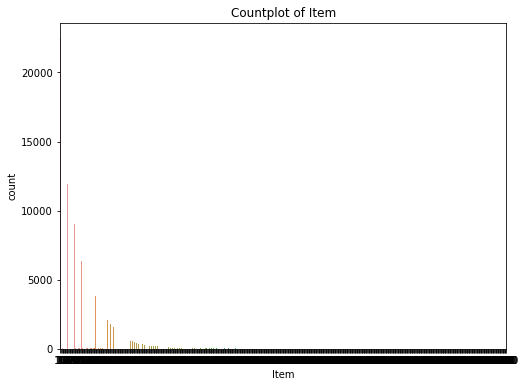

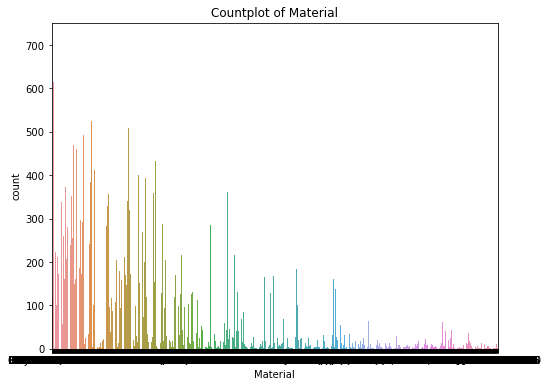

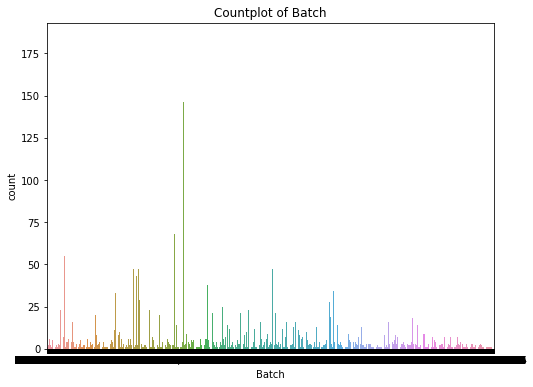

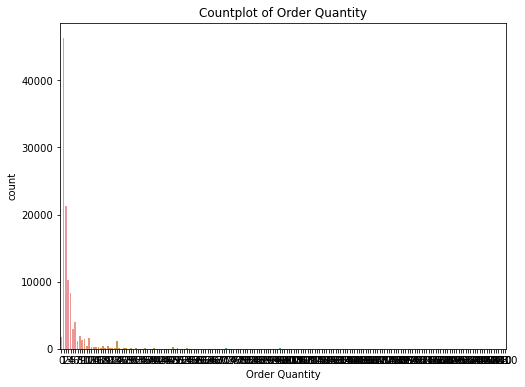

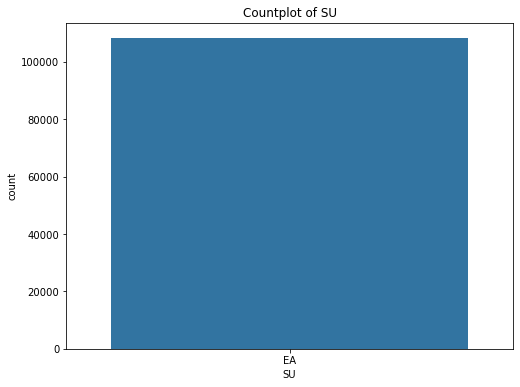

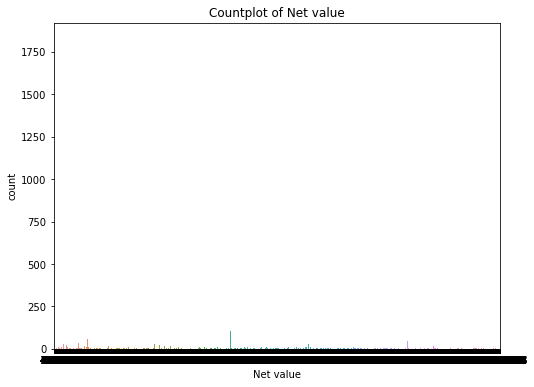

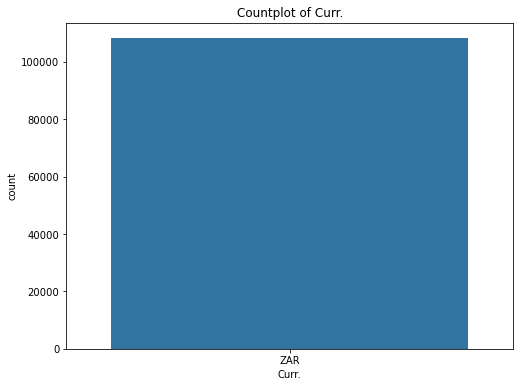

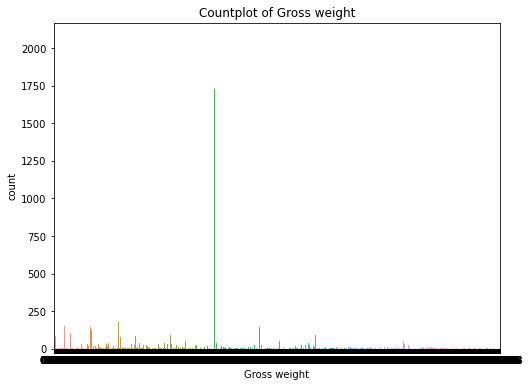

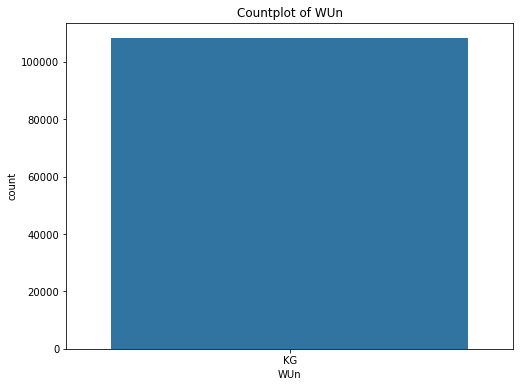

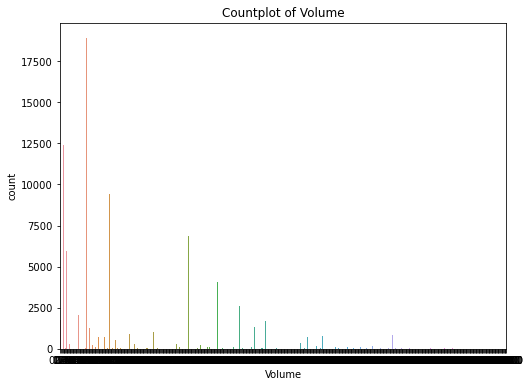

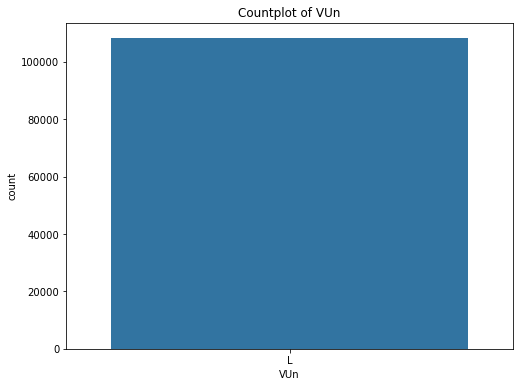

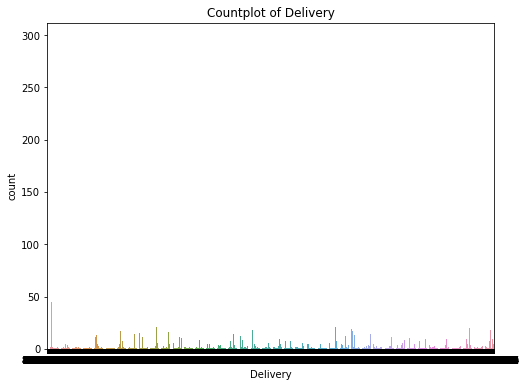

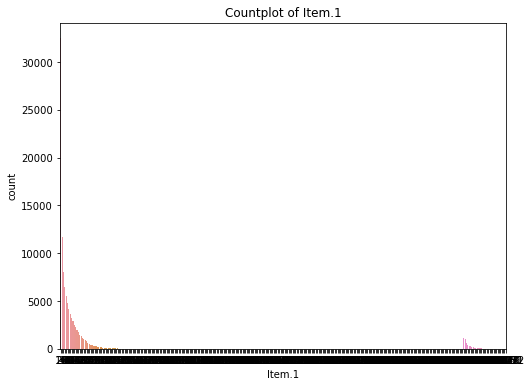

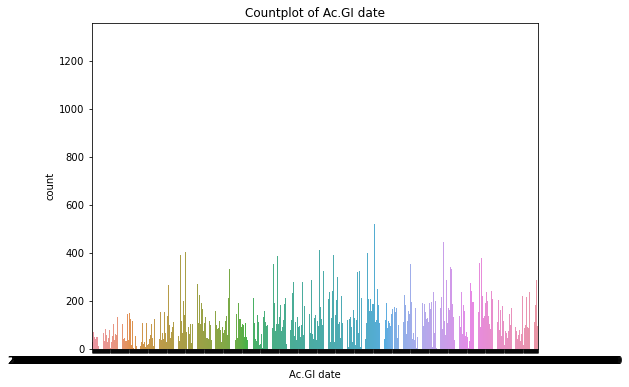

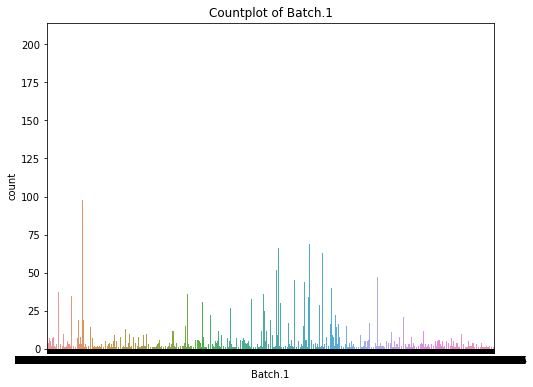

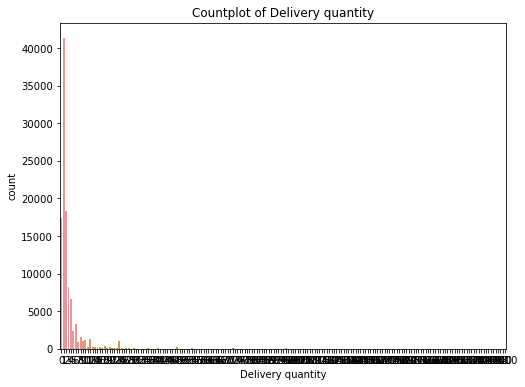

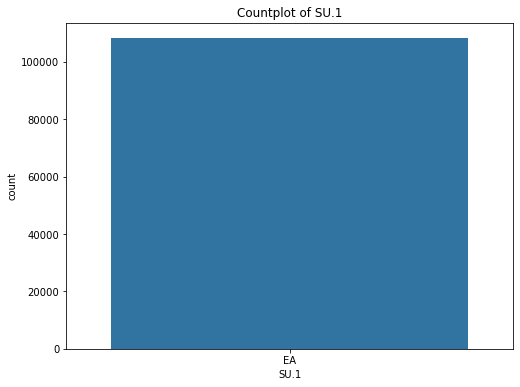

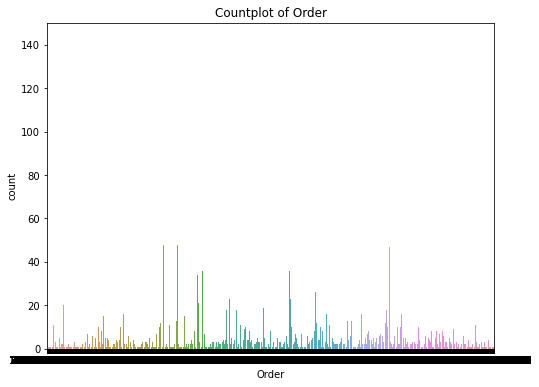

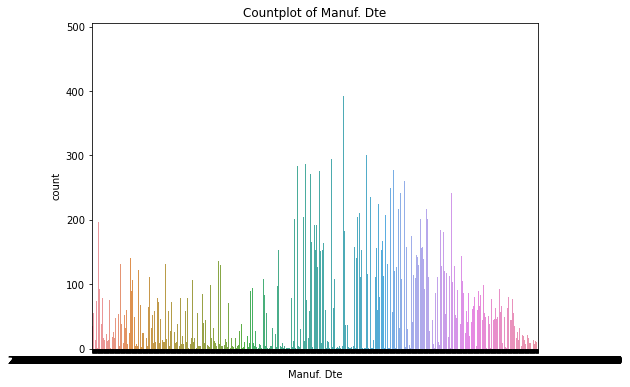

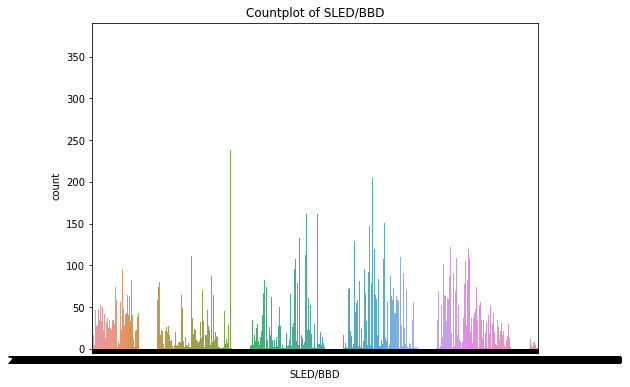

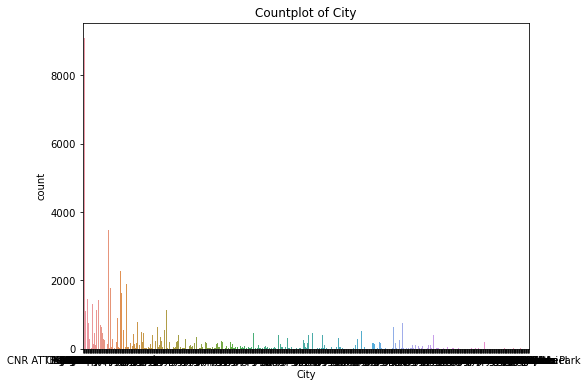

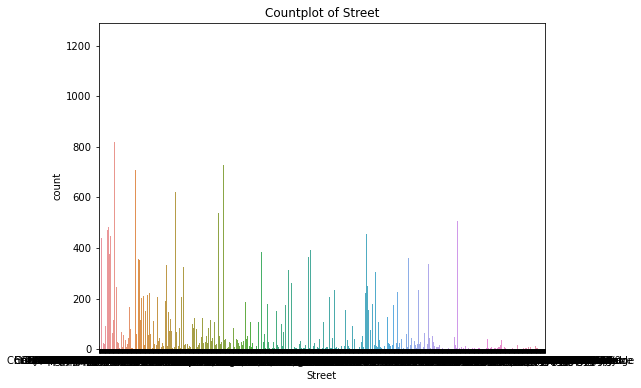

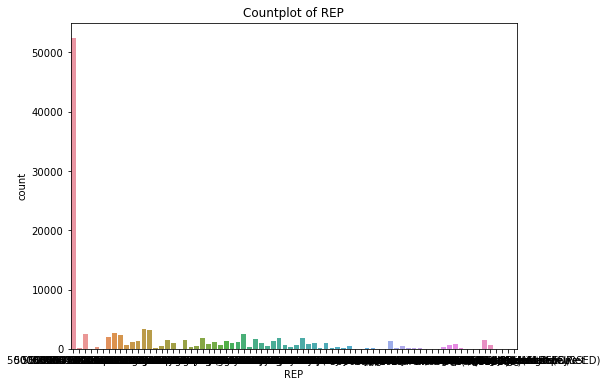

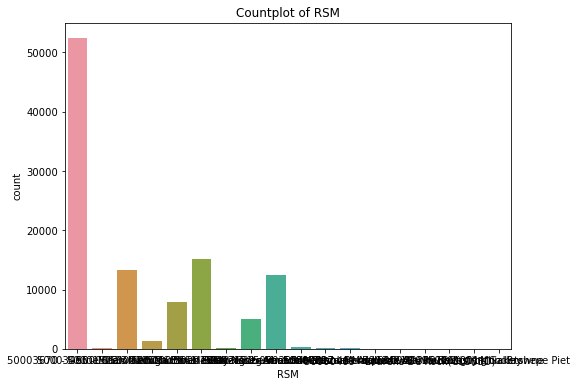

In [17]:
#countplot for categorical columns


import seaborn as sns
import matplotlib.pyplot as plt



# Set up a loop to create countplots for each categorical column
for column in df_returns:
    plt.figure(figsize=(8, 6))  # Set the size of each individual plot
    sns.countplot(x=column, data=df_returns)  # Create the countplot for the current column
    plt.title(f'Countplot of {column}')  # Set the title of the plot
    plt.xlabel(column)  # Set the label for the x-axis
    plt.show()  # Display the plot

In [49]:
# Set up a loop to create countplots for each categorical column

df2_categorical = df2['Plnt','SLoc','RSM']

for column in df2_categorical:
    plt.figure(figsize=(8, 6))  # Set the size of each individual plot
    sns.countplot(x=column, data=df2_categorical)  # Create the countplot for the current column
    plt.title(f'Countplot of {column}')  # Set the title of the plot
    plt.xlabel(column)  # Set the label for the x-axis
    plt.show()  # Display the plot

KeyError: ('Plnt', 'SLoc', 'RSM')

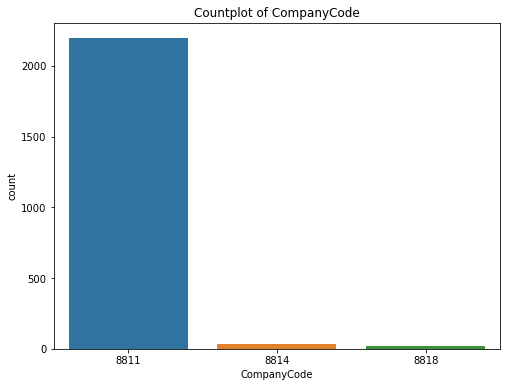

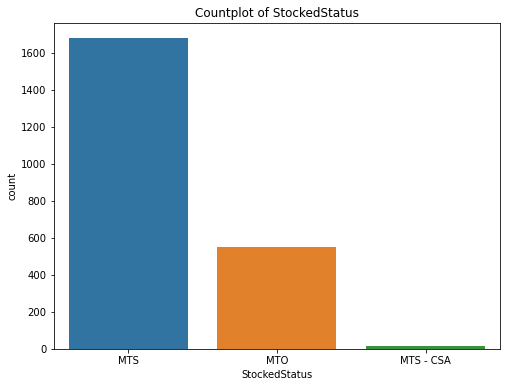

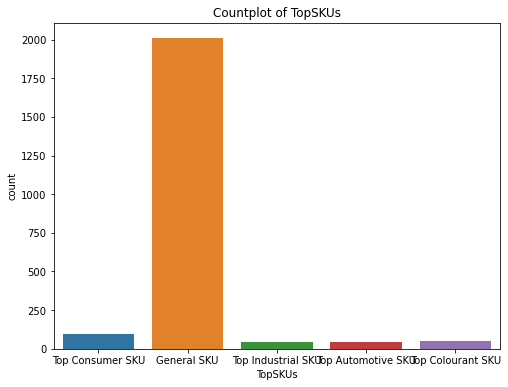

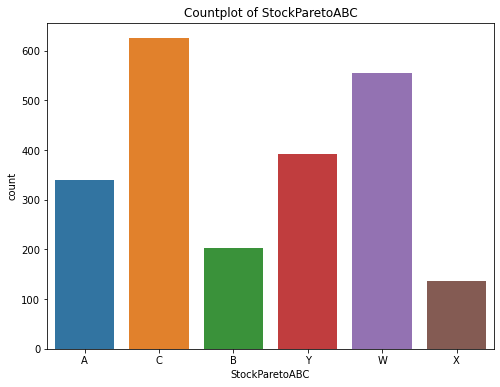

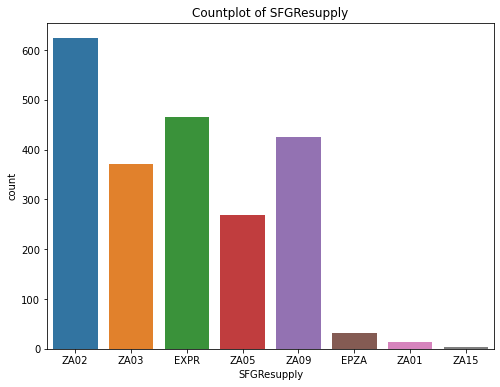

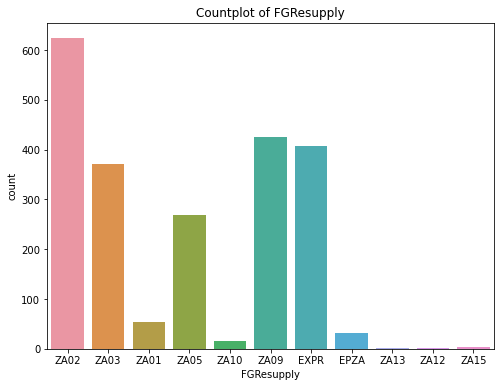

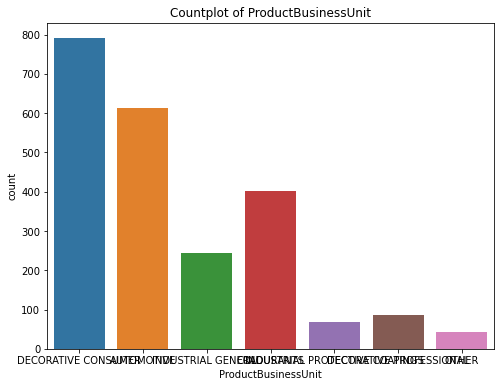

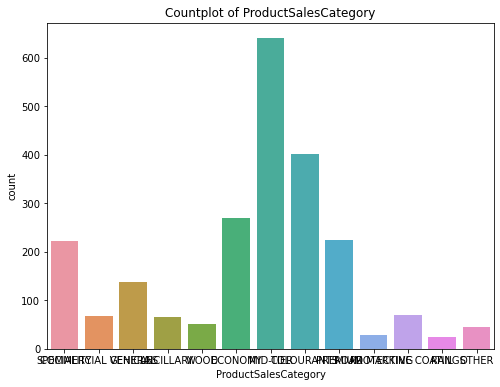

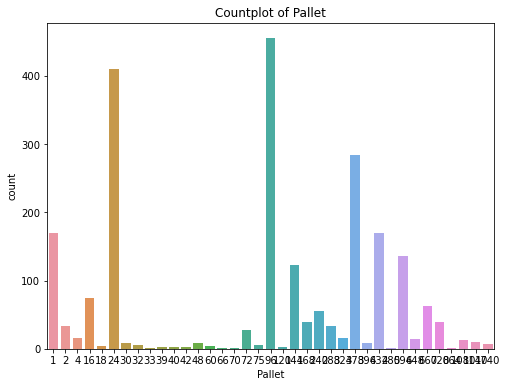

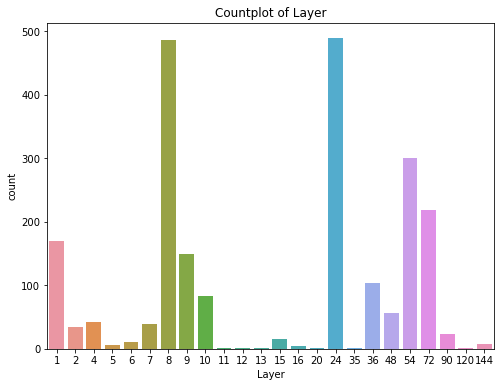

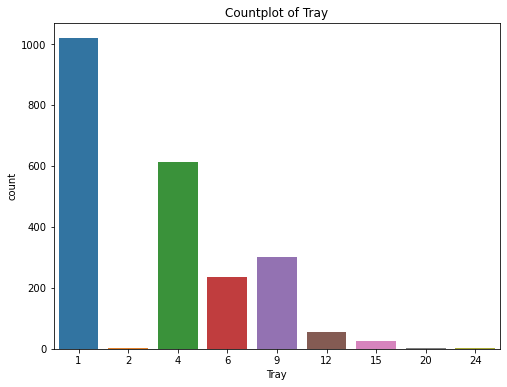

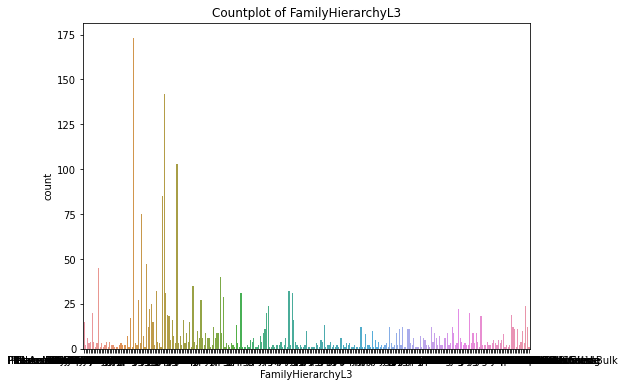

In [48]:
# Set up a loop to create countplots for each categorical column

#select columns to investigate

df3_categorical = df3[['CompanyCode','StockedStatus','TopSKUs','StockParetoABC','SFGResupply','FGResupply','ProductBusinessUnit','ProductSalesCategory','Pallet','Layer','Tray','FamilyHierarchyL3']]

for column in df3_categorical:
    plt.figure(figsize=(8, 6))  # Set the size of each individual plot
    sns.countplot(x=column, data=df3_categorical)  # Create the countplot for the current column
    plt.title(f'Countplot of {column}')  # Set the title of the plot
    plt.xlabel(column)  # Set the label for the x-axis
    plt.show()  # Display the plot

# Step 4: Data Preparation

### 4.1. Data Imputation & Clean the data

In [18]:
# find all missing data
df_returns.isnull().sum().sort_values(ascending=False)   # counts null values and arranges columns in ascending order with the most missing values

# in percentage form
for column in df_returns.columns:  
    percentage = df_returns[column].isnull().mean()   
    print(f'{column}: {round(percentage*100, 2)}%')   

Plnt: 0.0%
SLoc: 0.13%
Sold-to pt: 0.0%
Ship-to: 0.0%
Name 1: 0.0%
Created On: 0.0%
Time: 0.0%
Created By: 0.0%
OrdRs: 0.0%
Description: 0.0%
Sales Doc.: 0.0%
Item: 0.0%
Material: 0.0%
Batch: 22.57%
Order Quantity: 0.0%
SU: 0.0%
Net value: 0.0%
Curr.: 0.0%
Gross weight: 0.0%
WUn: 0.0%
Volume: 0.0%
VUn: 0.0%
Delivery: 0.0%
Item.1: 0.0%
Ac.GI date: 1.8%
Batch.1: 0.0%
Delivery quantity: 0.0%
SU.1: 0.0%
Order: 0.0%
Manuf. Dte: 0.01%
SLED/BBD: 0.01%
City: 0.17%
Street: 2.19%
REP: 0.0%
RSM: 0.0%


In [19]:
# from the data we can see that the Sloc, city and street,  are important columns that need to
# be dealt with

In [20]:
# cannot use mean, median, mode, arbitrary number or zero replacement so will have to drop the rows
# cannot use forward or backward propagation since this doesn't make any sense
# cannot drop columns as more than 15% is not missing

In [21]:
# use the dropna method

df_returns_nonulls = df_returns.dropna(subset=['SLoc','City','Street','Batch'])

In [22]:
# Test to see if all rows containing null values have been removed

# in percentage form
for column in df_returns_nonulls.columns:  
    percentage = df_returns_nonulls[column].isnull().mean()   
    print(f'{column}: {round(percentage*100, 2)}%')  

Plnt: 0.0%
SLoc: 0.0%
Sold-to pt: 0.0%
Ship-to: 0.0%
Name 1: 0.0%
Created On: 0.0%
Time: 0.0%
Created By: 0.0%
OrdRs: 0.0%
Description: 0.0%
Sales Doc.: 0.0%
Item: 0.0%
Material: 0.0%
Batch: 0.0%
Order Quantity: 0.0%
SU: 0.0%
Net value: 0.0%
Curr.: 0.0%
Gross weight: 0.0%
WUn: 0.0%
Volume: 0.0%
VUn: 0.0%
Delivery: 0.0%
Item.1: 0.0%
Ac.GI date: 2.29%
Batch.1: 0.0%
Delivery quantity: 0.0%
SU.1: 0.0%
Order: 0.0%
Manuf. Dte: 0.0%
SLED/BBD: 0.0%
City: 0.0%
Street: 0.0%
REP: 0.0%
RSM: 0.0%


In [23]:
# rename columns in dataframe for later joins

df2.rename(columns = {'ProductCode':'Material'}, inplace = True)
df2

,Material,StockedStatus,StockParetoABC,ProductDescription,PackSizeVol,PackNettWeight,SFG,SGConfirmed,SFGResupply,FGResupply,ProductBusinessUnit,ProductSalesCategory,Pallet,ShelfLife,Stream,StreamDescription
0,101002-2251,MTS,A,Pcell Pfilla Int. Crack Filler-12kg,12.000,12.00000,FXA005168,1.000,ZA02,ZA02,DECORATIVE CONSUMER,SPECIALITY,60,NaN,ZA02_PP_PPO,Powder Manufacture
1,101002-7241,MTS,C,Pcell Pfilla Int. Crack Filler-20x500g,10.000,10.00000,FXA005168,1.000,ZA02,ZA02,DECORATIVE CONSUMER,SPECIALITY,30,NaN,ZA02_PP_PPO,Powder Manufacture
2,101002-7246,MTS,A,Pcell Pfilla Int. Crack Filler-8x2kg,16.000,16.00000,FXA005168,1.000,ZA02,ZA02,DECORATIVE CONSUMER,SPECIALITY,18,NaN,ZA02_PP_PPO,Powder Manufacture
3,101801-7238,MTS,C,Pcell Pfilla Fine Crack Filler-4x500g,2.000,2.00000,101801,1.000,ZA02,ZA02,DECORATIVE CONSUMER,SPECIALITY,120,NaN,ZA02_PP_PPA,Paste Manufacture
4,101903-2251,MTS,A,Pcell Pfilla Ext. Crack Filler-12kg,12.000,12.00000,FXA005168,1.000,ZA02,ZA02,DECORATIVE CONSUMER,SPECIALITY,60,NaN,ZA02_PP_PPO,Powder Manufacture
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747,XZL/5LT,MTS,A,Xeracolour Zero Voc-Raw Umber-5l,5.000,7.86000,XZL-HSD,1.572,ZA09,ZA09,COLOURANTS,COLOURANTS,144,NaN,ZA09_HD_HSD,Other
1748,XZM/1LT,MTS,A,Xeracolour Zero Voc-Magenta-1l,1.000,1.39400,XZM-ALT,1.394,ZA09,ZA09,COLOURANTS,COLOURANTS,432,NaN,ZA09_BM_HOC,Hockmeyer Basketmill
1749,XZOO/1LT,MTS,A,Xeracolour Zero Voc-Orange Oxide-1l,1.000,1.73500,XZOO-NMN,1.735,ZA09,ZA09,COLOURANTS,COLOURANTS,432,NaN,ZA09_BM_HOC,Hockmeyer Basketmill
1750,XZTC/25KG,MTS,Y,Xeracolour Zero Voc-Tr Yellow Oxide-25kg,18.724,24.99654,XZTC-HOC,1.335,ZA09,ZA09,COLOURANTS,COLOURANTS,24,NaN,ZA09_BM_HOC,Hockmeyer Basketmill


In [24]:
#check for nulls in dataframe 2

# in percentage form
for column in df2.columns:  
    percentage = df2[column].isnull().mean()   
    print(f'{column}: {round(percentage*100, 2)}%')  

Material: 0.0%
StockedStatus: 0.0%
StockParetoABC: 0.0%
ProductDescription: 0.0%
PackSizeVol: 0.0%
PackNettWeight: 0.11%
SFG: 0.06%
SGConfirmed: 0.11%
SFGResupply: 0.0%
FGResupply: 0.74%
ProductBusinessUnit: 0.0%
ProductSalesCategory: 0.0%
Pallet: 0.0%
ShelfLife: 100.0%
Stream: 0.0%
StreamDescription: 0.0%


In [25]:
# just remove rows with nulls in SFG columns

# use the dropna method

df2_nonulls = df2.dropna(subset=['SFG'])

In [26]:
# check for nulls in df3
import pandas as pd
pd.set_option('display.max_rows', 5)
df3 = pd.read_excel('MasterSKUListWithSFG.xlsx')
df3.rename(columns = {'ProductCode':'Material'}, inplace = True)
df3

,CompanyCode,Material,StockedStatus,TopSKUs,StockParetoABC,ProductDescription,PackSizeVol,SFG,SGConfirmed,SFGResupply,FGResupply,ProductBusinessUnit,ProductSalesCategory,Hierarchy,FamilyHierarchyL1,FamilyHierarchyL2,FamilyHierarchyL3,Pallet,Layer,Tray,ShelfLife,MaterialCategory,ProductID
0,8811,101002-2251,MTS,Top Consumer SKU,A,Pcell Pfilla Int. Crack Filler-12kg,12.0,FXA005168,1.0,ZA02,ZA02,DECORATIVE CONSUMER,SPECIALITY,200112004120000489,Surface Preparation & Cleaning,Polycell,Polycell Fillers,60,10,1,NaN,NaN,182
1,8811,101002-7241,MTS,General SKU,C,Pcell Pfilla Int. Crack Filler-20x500g,10.0,FXA005168,1.0,ZA02,ZA02,DECORATIVE CONSUMER,SPECIALITY,200112004120000489,Surface Preparation & Cleaning,Polycell,Polycell Fillers,30,5,1,NaN,NaN,185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,8814,ZMT000048-9925,MTS,General SKU,C,Utility Masking Tape-48MM,1.0,Not Relevant,1.0,EPZA,EPZA,DECORATIVE CONSUMER,ANCILLARY,200142004920000527,Ancillary Item,General,General Other,1,1,1,NaN,NaN,6925
2246,8814,ZPS000010-9925,MTO,General SKU,W,Colad Paint Strainer,1.0,Not Relevant,1.0,NaN,NaN,AUTOMOTIVE,ANCILLARY,50000600000004,Ancilliary Items,Bodyshop Essentials,Non Branded,1,1,1,NaN,NaN,6932


In [27]:
# Test to see if all rows containing null values have been removed

# in percentage form
for column in df3.columns:  
    percentage = df3[column].isnull().mean()   
    print(f'{column}: {round(percentage*100, 2)}%')  

CompanyCode: 0.0%
Material: 0.0%
StockedStatus: 0.0%
TopSKUs: 0.0%
StockParetoABC: 0.0%
ProductDescription: 0.0%
PackSizeVol: 0.0%
SFG: 2.76%
SGConfirmed: 2.85%
SFGResupply: 2.0%
FGResupply: 2.0%
ProductBusinessUnit: 0.0%
ProductSalesCategory: 0.0%
Hierarchy: 0.0%
FamilyHierarchyL1: 0.0%
FamilyHierarchyL2: 0.0%
FamilyHierarchyL3: 0.0%
Pallet: 0.0%
Layer: 0.0%
Tray: 0.0%
ShelfLife: 100.0%
MaterialCategory: 100.0%
ProductID: 0.0%


In [28]:
# all columns intended to be used have no nan

### 4.2. Feature Engineering (addition and reduction)

In [29]:
# do a left join on material columns
df_returns= pd.merge(df_returns_nonulls,
                 df2_nonulls[['Material','SFG','StreamDescription','StockedStatus','StockParetoABC','ProductBusinessUnit','ProductSalesCategory']],   
                 on='Material', how='left')

pd.set_option('display.max_rows', 5)
df_returns

,Plnt,SLoc,Sold-to pt,Ship-to,Name 1,Created On,Time,Created By,OrdRs,Description,Sales Doc.,Item,Material,Batch,Order Quantity,SU,Net value,Curr.,Gross weight,WUn,Volume,VUn,Delivery,Item.1,Ac.GI date,Batch.1,Delivery quantity,SU.1,Order,Manuf. Dte,SLED/BBD,City,Street,REP,RSM,SFG,StreamDescription,StockedStatus,StockParetoABC,ProductBusinessUnit,ProductSalesCategory
0,ZA13,CV01,102982,102982,Game Canal Walk G060(Century),2020-01-06,09:00:32,KAFRIKA,23,Short delivered by driver,60672237,80,OCC000001-0005,M193833796,3,EA,1100.34,ZAR,21.486,KG,15.0,L,84128534,10,2020-01-06,M193833796,3,EA,200000078881,2019-10-15,2029-10-13,Milnerton,"Shop 549, Canal Walk",50000355 - Barend Venter,50003670 - Gerrie Stemmet,OCC000001,White Manufacture,MTS,B,DECORATIVE CONSUMER,SPECIALITY
1,ZA13,CV01,102982,102982,Game Canal Walk G060(Century),2020-01-06,09:00:32,KAFRIKA,23,Short delivered by driver,60672237,170,GTC000001-0005,M193333176,4,EA,1142.08,ZAR,21.400,KG,20.0,L,84128534,20,2020-01-06,M193333176,4,EA,200000077607,2019-09-17,2025-09-16,Milnerton,"Shop 549, Canal Walk",50000355 - Barend Venter,50003670 - Gerrie Stemmet,FXA000294,Enamel Blend Manufacture,MTS,C,DECORATIVE CONSUMER,MID-TIER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81625,ZA15,CV01,104497,104497,Game Mthatha - G085,2023-03-31,14:23:46,NNGCAI,Z03,Customer Error/over stock/not required,60981775,10,BBO000605-0020,L224267973,4,EA,3723.60,ZAR,103.740,KG,80.0,L,84172834,10,2023-03-31,L224267973,4,EA,200000118287,2022-11-02,2032-10-30,Mthatha,"Shop no 34, Mthatha Plaza",50000355 - Barend Venter,50003670 - Gerrie Stemmet,BBO000605,Colour Manufacture,MTS,A,DECORATIVE CONSUMER,PREMIUM
81626,ZA17,CV01,101291,101291,H & F Hardware,2023-03-31,14:26:21,POPRFCUSR,Z06,Short delivered by driver,60981776,10,TLS001000-0020,L230369132,1,EA,1750.58,ZAR,26.507,KG,20.0,L,84172835,10,2023-03-31,L230369132,1,EA,200000120145,2023-01-25,2033-01-22,Piet Retief,"6 Mahommedia rd, Kempuille",50004383 - Ricardo Pereira,50003750 - Ettiene Pieters,FXA001106,White Manufacture,MTS,A,DECORATIVE PROFESSIONAL,PREMIUM


In [30]:
# do a left join on material columns
df_returns= pd.merge(df_returns,
                 df3[['Material','FamilyHierarchyL3']],   
                 on='Material', how='left')

pd.set_option('display.max_rows', 5)
df_returns

,Plnt,SLoc,Sold-to pt,Ship-to,Name 1,Created On,Time,Created By,OrdRs,Description,Sales Doc.,Item,Material,Batch,Order Quantity,SU,Net value,Curr.,Gross weight,WUn,Volume,VUn,Delivery,Item.1,Ac.GI date,Batch.1,Delivery quantity,SU.1,Order,Manuf. Dte,SLED/BBD,City,Street,REP,RSM,SFG,StreamDescription,StockedStatus,StockParetoABC,ProductBusinessUnit,ProductSalesCategory,FamilyHierarchyL3
0,ZA13,CV01,102982,102982,Game Canal Walk G060(Century),2020-01-06,09:00:32,KAFRIKA,23,Short delivered by driver,60672237,80,OCC000001-0005,M193833796,3,EA,1100.34,ZAR,21.486,KG,15.0,L,84128534,10,2020-01-06,M193833796,3,EA,200000078881,2019-10-15,2029-10-13,Milnerton,"Shop 549, Canal Walk",50000355 - Barend Venter,50003670 - Gerrie Stemmet,OCC000001,White Manufacture,MTS,B,DECORATIVE CONSUMER,SPECIALITY,Plascon One Coat
1,ZA13,CV01,102982,102982,Game Canal Walk G060(Century),2020-01-06,09:00:32,KAFRIKA,23,Short delivered by driver,60672237,170,GTC000001-0005,M193333176,4,EA,1142.08,ZAR,21.400,KG,20.0,L,84128534,20,2020-01-06,M193333176,4,EA,200000077607,2019-09-17,2025-09-16,Milnerton,"Shop 549, Canal Walk",50000355 - Barend Venter,50003670 - Gerrie Stemmet,FXA000294,Enamel Blend Manufacture,MTS,C,DECORATIVE CONSUMER,MID-TIER,True Colour Bright Gloss White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81625,ZA15,CV01,104497,104497,Game Mthatha - G085,2023-03-31,14:23:46,NNGCAI,Z03,Customer Error/over stock/not required,60981775,10,BBO000605-0020,L224267973,4,EA,3723.60,ZAR,103.740,KG,80.0,L,84172834,10,2023-03-31,L224267973,4,EA,200000118287,2022-11-02,2032-10-30,Mthatha,"Shop no 34, Mthatha Plaza",50000355 - Barend Venter,50003670 - Gerrie Stemmet,BBO000605,Colour Manufacture,MTS,A,DECORATIVE CONSUMER,PREMIUM,Micatex STD Colour
81626,ZA17,CV01,101291,101291,H & F Hardware,2023-03-31,14:26:21,POPRFCUSR,Z06,Short delivered by driver,60981776,10,TLS001000-0020,L230369132,1,EA,1750.58,ZAR,26.507,KG,20.0,L,84172835,10,2023-03-31,L230369132,1,EA,200000120145,2023-01-25,2033-01-22,Piet Retief,"6 Mahommedia rd, Kempuille",50004383 - Ricardo Pereira,50003750 - Ettiene Pieters,FXA001106,White Manufacture,MTS,A,DECORATIVE PROFESSIONAL,PREMIUM,Professional Superior Low Sheen Tint Bas


In [31]:
# no outlier detection or removal required with categorical data
# No normalization required


### 4.3. Dimensional Reduction: Feature Selection 

In [32]:
# Filter out the useful columns

import pandas as pd

# Parameters filtered after first run
df_returns_filtered = df_returns[['Name 1','Description','Material','Volume','City','RSM','SFG','StreamDescription','StockParetoABC','ProductSalesCategory','FamilyHierarchyL3']]

pd.set_option('display.max_rows', 5)
df_returns_filtered

,Name 1,Description,Material,Volume,City,RSM,SFG,StreamDescription,StockParetoABC,ProductSalesCategory,FamilyHierarchyL3
0,Game Canal Walk G060(Century),Short delivered by driver,OCC000001-0005,15.0,Milnerton,50003670 - Gerrie Stemmet,OCC000001,White Manufacture,B,SPECIALITY,Plascon One Coat
1,Game Canal Walk G060(Century),Short delivered by driver,GTC000001-0005,20.0,Milnerton,50003670 - Gerrie Stemmet,FXA000294,Enamel Blend Manufacture,C,MID-TIER,True Colour Bright Gloss White
...,...,...,...,...,...,...,...,...,...,...,...
81625,Game Mthatha - G085,Customer Error/over stock/not required,BBO000605-0020,80.0,Mthatha,50003670 - Gerrie Stemmet,BBO000605,Colour Manufacture,A,PREMIUM,Micatex STD Colour
81626,H & F Hardware,Short delivered by driver,TLS001000-0020,20.0,Piet Retief,50003750 - Ettiene Pieters,FXA001106,White Manufacture,A,PREMIUM,Professional Superior Low Sheen Tint Bas


In [33]:
# PCA is not required as this is categorical data
# data balancing not required as this is not supervised learning

In [34]:
# Test to see if all rows containing null values have been removed

# in percentage form
for column in df_returns_filtered.columns:  
    percentage = df_returns_filtered[column].isnull().mean()   
    print(f'{column}: {round(percentage*100, 2)}%')  

Name 1: 0.0%
Description: 0.0%
Material: 0.0%
Volume: 0.0%
City: 0.0%
RSM: 0.0%
SFG: 4.49%
StreamDescription: 4.49%
StockParetoABC: 4.49%
ProductSalesCategory: 4.49%
FamilyHierarchyL3: 4.49%


In [35]:
# may have additional nan values as a result of the joining of tables and some values from the main branch not being present in the join tables - remove these

df_returns_filtered_nonulls = df_returns_filtered.dropna(subset=['SFG'])


In [36]:
# in percentage form
for column in df_returns_filtered_nonulls.columns:  
    percentage = df_returns_filtered_nonulls[column].isnull().mean()   
    print(f'{column}: {round(percentage*100, 2)}%') 

Name 1: 0.0%
Description: 0.0%
Material: 0.0%
Volume: 0.0%
City: 0.0%
RSM: 0.0%
SFG: 0.0%
StreamDescription: 0.0%
StockParetoABC: 0.0%
ProductSalesCategory: 0.0%
FamilyHierarchyL3: 0.0%


# Step 5: Modelling

-------------------------------------
Parameters
    -----------
- **n_clusters**:
  - *Type*: `int`
  - *Default*: `8`
  - *Description*: Number of clusters to form and centroids to generate.

- **max_iter**:
  - *Type*: `int`
  - *Default*: `300`
  - *Description*: Maximum number of iterations for a single run of the algorithm.

- **cat_dissim**:
  - *Type*: `func`
  - *Default*: `matching_dissim`
  - *Description*: Dissimilarity function for categorical variables.

- **init**:
  - *Type*: `str or ndarray`
  - *Default*: `'Cao'`
  - *Description*: Method for initializing centroids:
    - `'Huang'`: Huang's method
    - `'Cao'`: Cao's method
    - `'random'`: Randomly select initial centroids
    - `ndarray`: User-provided initial centroids

- **n_init**:
  - *Type*: `int`
  - *Default*: `10`
  - *Description*: Number of times the algorithm will be run with different centroid seeds.

- **verbose**:
  - *Type*: `int`, optional
  - *Description*: Verbosity mode for logging information during execution.


In [37]:
import numpy as np
X = df_returns_filtered_nonulls.values[:,1:]  # list all columns as list to be used in cluster model
X

array([['Short delivered by driver', 'OCC000001-0005', 15.0, ..., 'B',
        'SPECIALITY', 'Plascon One Coat'],
       ['Short delivered by driver', 'GTC000001-0005', 20.0, ..., 'C',
        'MID-TIER', 'True Colour Bright Gloss White'],
       ['Incorrectly ordered by customer', 'TCR000002-0020', 20.0, ...,
        'A', 'MID-TIER', 'True Colour Roof Paint'],
       ...,
       ['Customer Error/over stock/not required', '101801-7238', 2.0,
        ..., 'C', 'SPECIALITY', 'Polycell Fillers'],
       ['Customer Error/over stock/not required', 'BBO000605-0020', 80.0,
        ..., 'A', 'PREMIUM', 'Micatex STD Colour'],
       ['Short delivered by driver', 'TLS001000-0020', 20.0, ..., 'A',
        'PREMIUM', 'Professional Superior Low Sheen Tint Bas']],
      dtype=object)

In [38]:
 !pip install kmodes

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 591013.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3780, cost: 540703.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 9109, cost: 521561.0
Run 1, iteration: 2/100, moves: 2970, cost: 521561.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 8097, cost: 494645.0
Run 1, iteration: 2/100, moves: 25, cost: 494645.0
Initialization method and algorithm are deterministic. Setting 

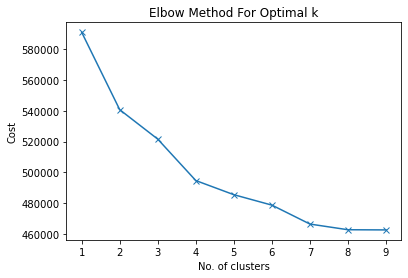

In [39]:
# import necessary libraries
import pandas as pd
import numpy as np
# !pip install kmodes
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
%matplotlib inline


# screen plot or elbow curve to find the optimal K value

cost = []
K = range(1,10)  # max K values to iterate through
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 5, verbose=1)
    kmode.fit_predict(X)  # fit the model 
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'x-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [40]:
# elbow at 7


kmode = KModes(n_clusters=7, init = "Cao", n_init = 5, verbose=1)
clusters = kmode.fit_predict(X)
clusters

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 8797, cost: 467215.0
Run 1, iteration: 2/100, moves: 4084, cost: 466381.0
Run 1, iteration: 3/100, moves: 191, cost: 466381.0


array([0, 1, 2, ..., 3, 2, 0], dtype=uint16)

In [41]:
# add this column back to the original dataframe

# Convert clusters to a list
clusters_list = clusters.tolist()

# Add the 'Cluster' column back to the original DataFrame using .assign
df_returns_filtered_nonulls = df_returns_filtered_nonulls.assign(Cluster=clusters_list)

# Display the updated DataFrame
print(df_returns_filtered_nonulls)


                              Name 1                             Description  \
0      Game Canal Walk G060(Century)               Short delivered by driver   
1      Game Canal Walk G060(Century)               Short delivered by driver   
...                              ...                                     ...   
81625            Game Mthatha - G085  Customer Error/over stock/not required   
81626                 H & F Hardware               Short delivered by driver   

             Material  Volume         City                         RSM  \
0      OCC000001-0005    15.0    Milnerton   50003670 - Gerrie Stemmet   
1      GTC000001-0005    20.0    Milnerton   50003670 - Gerrie Stemmet   
...               ...     ...          ...                         ...   
81625  BBO000605-0020    80.0      Mthatha   50003670 - Gerrie Stemmet   
81626  TLS001000-0020    20.0  Piet Retief  50003750 - Ettiene Pieters   

             SFG         StreamDescription StockParetoABC  \
0      OCC000

In [42]:
# download to Excel
# determining the name of the file
file_name = 'Clusters.xlsx'
  
# saving the excel
df_returns_filtered.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


# Step 5: Model Evaluation

In [43]:
# count the number of entries in each cluster
df_returns_cluster_count = df_returns_filtered_nonulls.groupby(['Cluster'])[["Cluster"]].count()
df_returns_cluster_count

,Cluster
Cluster,
0,22346
1,13079
...,...
5,3795
6,5237


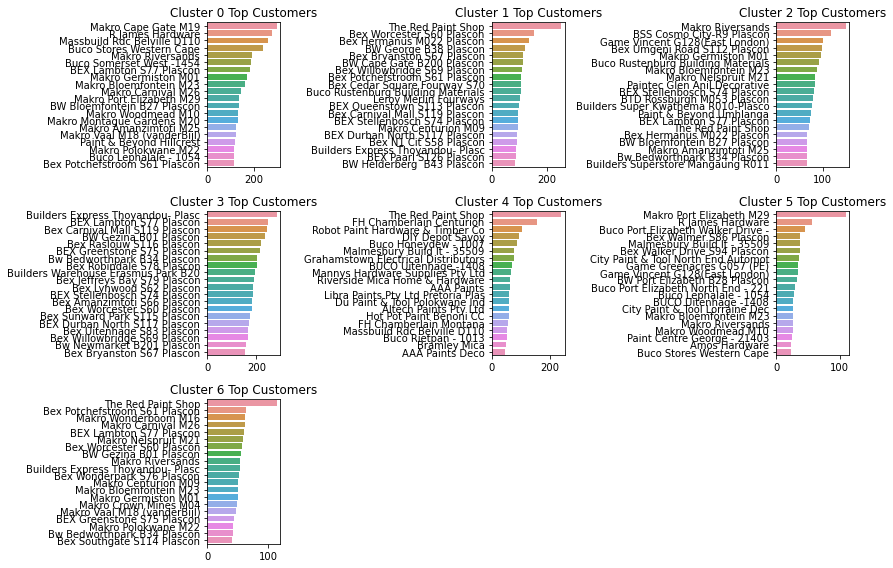

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter each cluster's data separately
df_cluster0data = df_returns_filtered_nonulls[df_returns_filtered_nonulls['Cluster'] == 0]
df_cluster1data = df_returns_filtered_nonulls[df_returns_filtered_nonulls['Cluster'] == 1]
df_cluster2data = df_returns_filtered_nonulls[df_returns_filtered_nonulls['Cluster'] == 2]
df_cluster3data = df_returns_filtered_nonulls[df_returns_filtered_nonulls['Cluster'] == 3]
df_cluster4data = df_returns_filtered_nonulls[df_returns_filtered_nonulls['Cluster'] == 4]
df_cluster5data = df_returns_filtered_nonulls[df_returns_filtered_nonulls['Cluster'] == 5]
df_cluster6data = df_returns_filtered_nonulls[df_returns_filtered_nonulls['Cluster'] == 6]

# Function to get top customers by cluster
def get_top_customers(df_cluster, n=20):
    return df_cluster['Name 1'].value_counts().nlargest(n)

# Get top customers for each cluster
top_customers_cluster0 = get_top_customers(df_cluster0data)
top_customers_cluster1 = get_top_customers(df_cluster1data)
top_customers_cluster2 = get_top_customers(df_cluster2data)
top_customers_cluster3 = get_top_customers(df_cluster3data)
top_customers_cluster4 = get_top_customers(df_cluster4data)
top_customers_cluster5 = get_top_customers(df_cluster5data)
top_customers_cluster6 = get_top_customers(df_cluster6data)

# Plotting top customers for each cluster
plt.figure(figsize=(12, 8))
plt.subplot(3, 3, 1)
sns.barplot(x=top_customers_cluster0.values, y=top_customers_cluster0.index)
plt.title('Cluster 0 Top Customers')

plt.subplot(3, 3, 2)
sns.barplot(x=top_customers_cluster1.values, y=top_customers_cluster1.index)
plt.title('Cluster 1 Top Customers')

plt.subplot(3, 3, 3)
sns.barplot(x=top_customers_cluster2.values, y=top_customers_cluster2.index)
plt.title('Cluster 2 Top Customers')

plt.subplot(3, 3, 4)
sns.barplot(x=top_customers_cluster3.values, y=top_customers_cluster3.index)
plt.title('Cluster 3 Top Customers')

plt.subplot(3, 3, 5)
sns.barplot(x=top_customers_cluster4.values, y=top_customers_cluster4.index)
plt.title('Cluster 4 Top Customers')

plt.subplot(3, 3, 6)
sns.barplot(x=top_customers_cluster5.values, y=top_customers_cluster5.index)
plt.title('Cluster 5 Top Customers')

plt.subplot(3, 3, 7)
sns.barplot(x=top_customers_cluster6.values, y=top_customers_cluster6.index)
plt.title('Cluster 6 Top Customers')

plt.tight_layout()
plt.show()

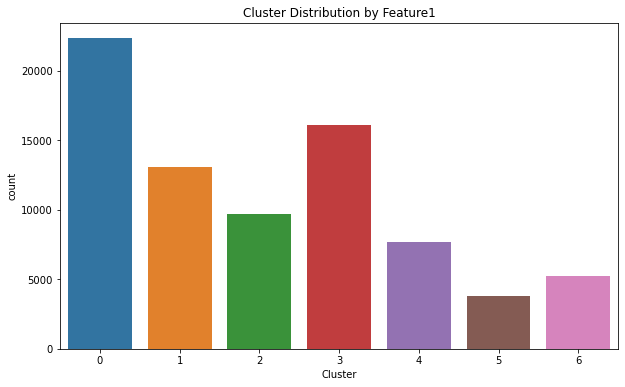

In [45]:
# Add cluster labels to DataFrame
import matplotlib.pyplot as plt
import seaborn as sns


# Visualize cluster distribution using seaborn countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df_returns_filtered_nonulls, x='Cluster')
plt.title('Cluster Distribution by Feature1')
plt.show()